In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

In [3]:
!gdown 1BXgKslZIM0uOibXjJU7zBK6xJo57ohK1

Downloading...
From: https://drive.google.com/uc?id=1BXgKslZIM0uOibXjJU7zBK6xJo57ohK1
To: /content/amazon_final5.csv
100% 81.8M/81.8M [00:00<00:00, 128MB/s]


In [4]:
fp=pd.read_csv('amazon_final5.csv')
fp

,product_name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,company,discount_percentage,high_low
0,AJS Men's Fashion Jewellery Set Combo of 2 Rho...,stores,Men's Fashion,-1.0,0,249,399,AJS,62.41,NOT_RATED
1,Peter England Men's Slim Fit AV Linen Casual S...,men's clothing,Shirts,3.1,30,1229,1999,Peter,61.48,HIGH_RATED_PRODUCT
2,LANCER Mens Rambo-171 Running Shoe,men's shoes,Sports Shoes,-1.0,0,1079,1999,LANCER,53.98,NOT_RATED
3,Levi's Men T-Shirt,men's clothing,T-shirts & Polos,-1.0,0,953,1699,Levi's,56.09,NOT_RATED
4,swiss track Analog Chain Strap Watch for Gift ...,accessories,Watches,-1.0,0,935,2599,swiss,35.98,NOT_RATED
...,...,...,...,...,...,...,...,...,...,...
527534,Knot-it-All Women's Premium Handmade with Macr...,accessories,Handbags & Clutches,4.3,10,980,1999,Knot-it-All,49.02,HIGH_RATED_PRODUCT
527535,Rupa Frontline Men's Cotton Trunks (8903978452...,men's clothing,Innerwear,5.0,1,180,200,Rupa,90.00,HIGH_RATED_PRODUCT
527536,Urbano Fashion Men's Blue Slim Fit Washed Jean...,men's clothing,Jeans,-1.0,0,829,2099,Urbano,39.49,NOT_RATED
527537,numeroastro Original & Natural Mix Tumble Ston...,accessories,Jewellery,3.2,6,790,2799,numeroastro,28.22,HIGH_RATED_PRODUCT


In [5]:
fp['discount_percentage']=round((fp['discount_price']/fp['actual_price'])*100,2)
fp

,product_name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,company,discount_percentage,high_low
0,AJS Men's Fashion Jewellery Set Combo of 2 Rho...,stores,Men's Fashion,-1.0,0,249,399,AJS,62.41,NOT_RATED
1,Peter England Men's Slim Fit AV Linen Casual S...,men's clothing,Shirts,3.1,30,1229,1999,Peter,61.48,HIGH_RATED_PRODUCT
2,LANCER Mens Rambo-171 Running Shoe,men's shoes,Sports Shoes,-1.0,0,1079,1999,LANCER,53.98,NOT_RATED
3,Levi's Men T-Shirt,men's clothing,T-shirts & Polos,-1.0,0,953,1699,Levi's,56.09,NOT_RATED
4,swiss track Analog Chain Strap Watch for Gift ...,accessories,Watches,-1.0,0,935,2599,swiss,35.98,NOT_RATED
...,...,...,...,...,...,...,...,...,...,...
527534,Knot-it-All Women's Premium Handmade with Macr...,accessories,Handbags & Clutches,4.3,10,980,1999,Knot-it-All,49.02,HIGH_RATED_PRODUCT
527535,Rupa Frontline Men's Cotton Trunks (8903978452...,men's clothing,Innerwear,5.0,1,180,200,Rupa,90.00,HIGH_RATED_PRODUCT
527536,Urbano Fashion Men's Blue Slim Fit Washed Jean...,men's clothing,Jeans,-1.0,0,829,2099,Urbano,39.49,NOT_RATED
527537,numeroastro Original & Natural Mix Tumble Ston...,accessories,Jewellery,3.2,6,790,2799,numeroastro,28.22,HIGH_RATED_PRODUCT


In [6]:
new=fp[fp['ratings']!=-1]

In [7]:
new_data=new.groupby(by=new['main_category'])

In [8]:
avg_each_category=round(new_data['ratings'].mean(),2)
avg_each_category

main_category
accessories                3.90
appliances                 3.84
bags & luggage             3.94
beauty & health            4.00
car & motorbike            3.73
grocery & gourmet foods    4.07
home & kitchen             3.98
home, kitchen, pets        3.22
industrial supplies        3.84
kids' fashion              3.86
men's clothing             3.77
men's shoes                3.63
music                      3.96
pet supplies               4.03
sports & fitness           3.80
stores                     3.94
toys & baby products       4.03
tv, audio & cameras        3.83
women's clothing           3.77
women's shoes              3.68
Name: ratings, dtype: float64

In [9]:
max_rated_category=round(new_data['ratings'].mean(),2).idxmax()

In [10]:
max_rated_category

'grocery & gourmet foods'

In [11]:
max_rating=new.loc[new['main_category']==max_rated_category]
max_rating

,product_name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,company,discount_percentage,high_low
863,"Keya Italian Pizza Oregano 80gm, Pack 2",grocery & gourmet foods,All Grocery & Gourmet Foods,4.6,415,175,218,Keya,80.28,HIGH_RATED_PRODUCT
889,Zenzi Sparkling Water Multi-Flavoured Pack of ...,grocery & gourmet foods,"Coffee, Tea & Beverages",3.2,126,205,240,Zenzi,85.42,HIGH_RATED_PRODUCT
947,"Timeless Food : Farali Khakhra for Upwas, Vrat...",grocery & gourmet foods,Snack Foods,4.5,18,245,300,Timeless,81.67,HIGH_RATED_PRODUCT
3210,Nutty Gritties Premium Mix Berries Dried Fruit...,grocery & gourmet foods,All Grocery & Gourmet Foods,4.1,3829,329,390,Nutty,84.36,HIGH_RATED_PRODUCT
3233,"Qua Natural Mineral Water, 1 l, Pack of 12",grocery & gourmet foods,"Coffee, Tea & Beverages",4.2,117,0,1200,Qua,0.00,HIGH_RATED_PRODUCT
...,...,...,...,...,...,...,...,...,...,...
523799,TGL Co. The Good Life Company Kadak Masala Cha...,grocery & gourmet foods,"Coffee, Tea & Beverages",4.1,148,330,399,TGL,82.71,HIGH_RATED_PRODUCT
523856,"Cadbury Chocobakes Choc Filled Cookies, 10 x 75 g",grocery & gourmet foods,Snack Foods,4.3,1505,299,300,Cadbury,99.67,HIGH_RATED_PRODUCT
526116,PILGRIM Korean 5% Vitamin C Face Serum (Oil Ba...,grocery & gourmet foods,All Grocery & Gourmet Foods,3.9,2593,397,550,PILGRIM,72.18,HIGH_RATED_PRODUCT
526142,Levista Classic Pure Instant Ground Coffee (50...,grocery & gourmet foods,"Coffee, Tea & Beverages",4.0,61,105,135,Levista,77.78,HIGH_RATED_PRODUCT


In [12]:
max=max_rating['ratings']
max

863       4.6
889       3.2
947       4.5
3210      4.1
3233      4.2
         ... 
523799    4.1
523856    4.3
526116    3.9
526142    4.0
526200    4.0
Name: ratings, Length: 2998, dtype: float64

<Axes: xlabel='ratings', ylabel='discount_percentage'>

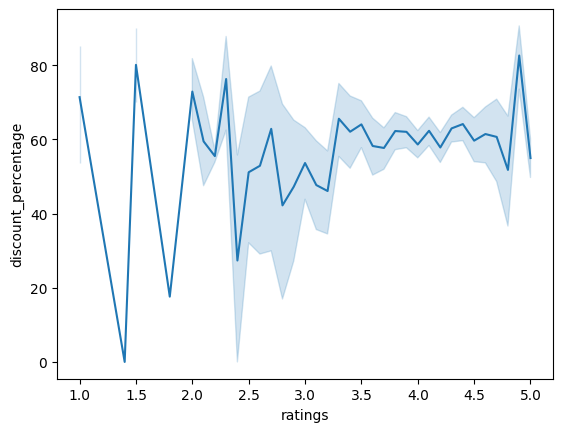

In [13]:
sns.lineplot(data=max_rating,x='ratings',y='discount_percentage')

as from above graph we can say that there is no significance relation between rating and discount percentage for the highest rated category which is 'grocery and gourments'

there is nothing like if the rating increases then the discount percentage increase as continuosly

there isnt any relation between rating and discount percentage for the highest rated category


<Axes: xlabel='ratings', ylabel='actual_price'>

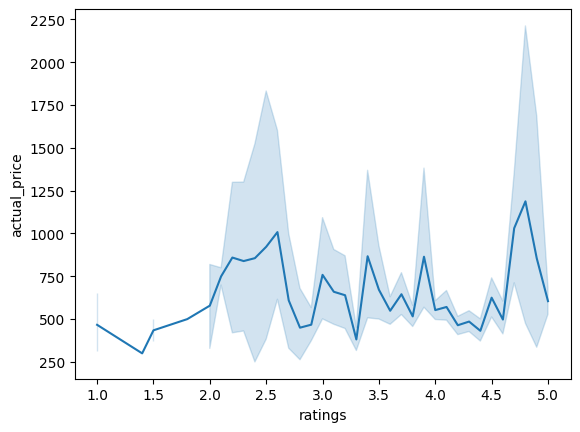

In [14]:
sns.lineplot(data=max_rating,x='ratings',y='actual_price')

as from above graph we can say that there is no significance relation between rating and actual price for the highest rated category which is 'grocery and gourments'

there is nothing like if the rating increases then the actual price increase as continuosly

there isnt any relation between rating and actual price for the highest rated category

In [15]:
stats,p=ttest_rel(max_rating['ratings'],max_rating['actual_price'])

In [16]:
Ha='ratings and actual price are not significance for highest rated category'
H0='ratings and actual price are significance for highest rated category'
alpha=0.05  #95% significance
if p<alpha:
  print('reject H0')
  print(Ha)
else:
  print('accept H0')
  print(H0)


reject H0
ratings and actual price are not significance for highest rated category


In [17]:
stats,p=ttest_rel(max_rating['ratings'],max_rating['discount_percentage'])
p


0.0

In [18]:
Ha='ratings and discount perc are not significance for highest rated category'
H0='ratings and discount perc are significance for highest rated category'
alpha=0.05  #95% significance
if p<alpha:
  print('reject H0')
  print(Ha)
else:
  print('accept H0')
  print(H0)

reject H0
ratings and discount perc are not significance for highest rated category


max rated categories


In [19]:
avg_category=round(new_data['ratings'].mean(),2).mean()

In [20]:
avg_category

3.841

In [21]:
avg_each_category>avg_category

main_category
accessories                 True
appliances                 False
bags & luggage              True
beauty & health             True
car & motorbike            False
grocery & gourmet foods     True
home & kitchen              True
home, kitchen, pets        False
industrial supplies        False
kids' fashion               True
men's clothing             False
men's shoes                False
music                       True
pet supplies                True
sports & fitness           False
stores                      True
toys & baby products        True
tv, audio & cameras        False
women's clothing           False
women's shoes              False
Name: ratings, dtype: bool

max rated productss...

In [22]:
df=pd.read_csv('amazon_final5.csv')
df

,product_name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,company,discount_percentage,high_low
0,AJS Men's Fashion Jewellery Set Combo of 2 Rho...,stores,Men's Fashion,-1.0,0,249,399,AJS,62.41,NOT_RATED
1,Peter England Men's Slim Fit AV Linen Casual S...,men's clothing,Shirts,3.1,30,1229,1999,Peter,61.48,HIGH_RATED_PRODUCT
2,LANCER Mens Rambo-171 Running Shoe,men's shoes,Sports Shoes,-1.0,0,1079,1999,LANCER,53.98,NOT_RATED
3,Levi's Men T-Shirt,men's clothing,T-shirts & Polos,-1.0,0,953,1699,Levi's,56.09,NOT_RATED
4,swiss track Analog Chain Strap Watch for Gift ...,accessories,Watches,-1.0,0,935,2599,swiss,35.98,NOT_RATED
...,...,...,...,...,...,...,...,...,...,...
527534,Knot-it-All Women's Premium Handmade with Macr...,accessories,Handbags & Clutches,4.3,10,980,1999,Knot-it-All,49.02,HIGH_RATED_PRODUCT
527535,Rupa Frontline Men's Cotton Trunks (8903978452...,men's clothing,Innerwear,5.0,1,180,200,Rupa,90.00,HIGH_RATED_PRODUCT
527536,Urbano Fashion Men's Blue Slim Fit Washed Jean...,men's clothing,Jeans,-1.0,0,829,2099,Urbano,39.49,NOT_RATED
527537,numeroastro Original & Natural Mix Tumble Ston...,accessories,Jewellery,3.2,6,790,2799,numeroastro,28.22,HIGH_RATED_PRODUCT


In [23]:
df[df['ratings']!=-1]

,product_name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,company,discount_percentage,high_low
1,Peter England Men's Slim Fit AV Linen Casual S...,men's clothing,Shirts,3.1,30,1229,1999,Peter,61.48,HIGH_RATED_PRODUCT
5,Clifton Women Sleeveless Tshirt-Kitty,women's clothing,Western Wear,5.0,1,249,599,Clifton,41.57,HIGH_RATED_PRODUCT
9,FEMEZONE Fashion with Tradition Women's Rayon ...,women's clothing,Ethnic Wear,3.3,83,929,4999,FEMEZONE,18.58,HIGH_RATED_PRODUCT
10,Radhesh Creation And Jewellery Kundan Work wit...,accessories,Fashion & Silver Jewellery,4.2,20,229,1199,Radhesh,19.10,HIGH_RATED_PRODUCT
11,MUTAQINOTI Men's Oxford Style Luxury Leather H...,men's shoes,Formal Shoes,4.0,1,1399,4999,MUTAQINOTI,27.99,HIGH_RATED_PRODUCT
...,...,...,...,...,...,...,...,...,...,...
527533,PC Jeweller 18KT Yellow Gold and Diamond Stud ...,accessories,Gold & Diamond Jewellery,4.0,1,29636,34866,PC,85.00,HIGH_RATED_PRODUCT
527534,Knot-it-All Women's Premium Handmade with Macr...,accessories,Handbags & Clutches,4.3,10,980,1999,Knot-it-All,49.02,HIGH_RATED_PRODUCT
527535,Rupa Frontline Men's Cotton Trunks (8903978452...,men's clothing,Innerwear,5.0,1,180,200,Rupa,90.00,HIGH_RATED_PRODUCT
527537,numeroastro Original & Natural Mix Tumble Ston...,accessories,Jewellery,3.2,6,790,2799,numeroastro,28.22,HIGH_RATED_PRODUCT


In [24]:
max_rated_products=df[df['high_low']=='HIGH_RATED_PRODUCT']

In [25]:
max_rated_products

,product_name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,company,discount_percentage,high_low
1,Peter England Men's Slim Fit AV Linen Casual S...,men's clothing,Shirts,3.1,30,1229,1999,Peter,61.48,HIGH_RATED_PRODUCT
5,Clifton Women Sleeveless Tshirt-Kitty,women's clothing,Western Wear,5.0,1,249,599,Clifton,41.57,HIGH_RATED_PRODUCT
9,FEMEZONE Fashion with Tradition Women's Rayon ...,women's clothing,Ethnic Wear,3.3,83,929,4999,FEMEZONE,18.58,HIGH_RATED_PRODUCT
10,Radhesh Creation And Jewellery Kundan Work wit...,accessories,Fashion & Silver Jewellery,4.2,20,229,1199,Radhesh,19.10,HIGH_RATED_PRODUCT
11,MUTAQINOTI Men's Oxford Style Luxury Leather H...,men's shoes,Formal Shoes,4.0,1,1399,4999,MUTAQINOTI,27.99,HIGH_RATED_PRODUCT
...,...,...,...,...,...,...,...,...,...,...
527530,Shasmi Wine Embroidered Embellished Georgette ...,women's clothing,Ethnic Wear,3.7,3,819,3499,Shasmi,23.41,HIGH_RATED_PRODUCT
527533,PC Jeweller 18KT Yellow Gold and Diamond Stud ...,accessories,Gold & Diamond Jewellery,4.0,1,29636,34866,PC,85.00,HIGH_RATED_PRODUCT
527534,Knot-it-All Women's Premium Handmade with Macr...,accessories,Handbags & Clutches,4.3,10,980,1999,Knot-it-All,49.02,HIGH_RATED_PRODUCT
527535,Rupa Frontline Men's Cotton Trunks (8903978452...,men's clothing,Innerwear,5.0,1,180,200,Rupa,90.00,HIGH_RATED_PRODUCT


<Axes: xlabel='ratings', ylabel='discount_percentage'>

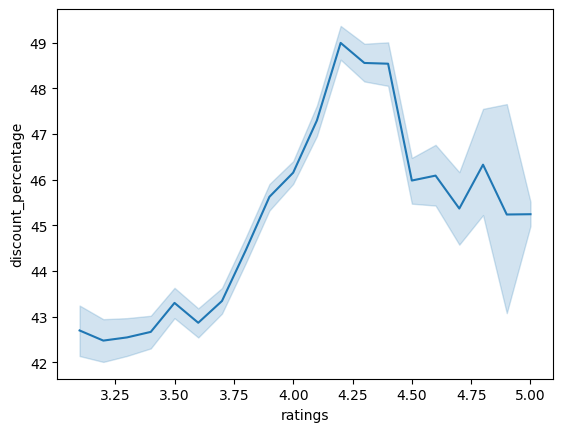

In [26]:
sns.lineplot(data=max_rated_products,x='ratings',y='discount_percentage')

as from above graph we can say that there is somehow significance relation between rating and discount percentage for the highest rated products

there is like if the rating increases then the discount percentage increase at
between 3.25 to 4.25 then somehow decrease

there is relation between rating and discount percentage for the highest rated products

<Axes: xlabel='ratings', ylabel='discount_price'>

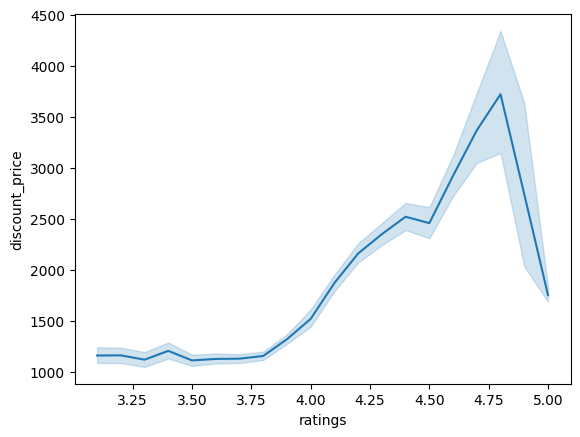

In [27]:
sns.lineplot(data=max_rated_products,x='ratings',y='discount_price')

as from above graph we can say that there is significance relation between rating and discount price for the highest rated products

there is like if the rating increases then the discount price increase at
between 3.25 to 4.75 then somehow decrease

there is relation between rating and discount price for the highest rated products

In [28]:
Ha='rating and discount percentage are significance for high rated products'
H0='rating and discount percentage are not significance for high rated products'

stat,p1=ttest_rel(max_rated_products['ratings'],max_rated_products['discount_price'])
print(p1)

alpha=0.05  #95% significance
if p1<alpha:
  print('reject H0')
  print(Ha)
else:
  print('accept H0')
  print(H0)

0.0
reject H0
rating and discount percentage are significance for high rated products


<Axes: xlabel='ratings', ylabel='actual_price'>

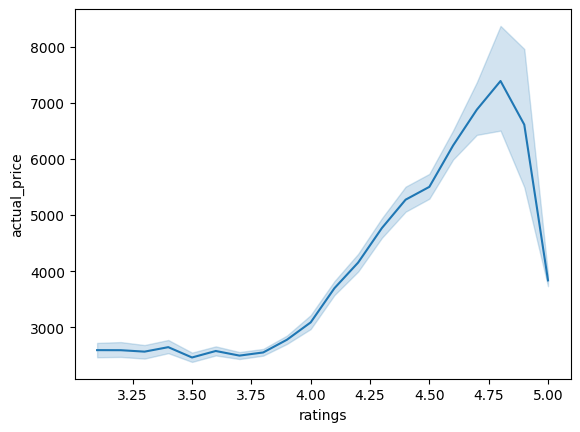

In [29]:
sns.lineplot(data=max_rated_products,x='ratings',y='actual_price')

as from above graph we can say that there is significance relation between rating and actual price for the highest rated products

there is like if the rating increases then the actual price increase at
between 3.25 to 4.75 then somehow decrease

there is relation between rating and actual price for the highest rated products

In [30]:
Ha='rating and actual price are significance for high rated products'
H0='rating and actual price are not significance for high rated products'

stat,p2=ttest_rel(max_rated_products['ratings'],max_rated_products['actual_price'])
p2
alpha=0.05  #95% significance
if p2<alpha:
  print('reject H0')
  print(Ha)
else:
  print('accept H0')
  print(H0)

reject H0
rating and actual price are significance for high rated products


low rated products



In [31]:
low_rated_products=df[df['high_low']=='LOW_RATED_PRODUCT']

In [32]:
low_rated_products

,product_name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,company,discount_percentage,high_low
13,EESKY Blue Sling Bag Girls Print Style Friends...,accessories,Handbags & Clutches,2.3,2,299,499,EESKY,59.92,LOW_RATED_PRODUCT
32,Magic Polyester Digital Printed Hobo Women's B...,accessories,Handbags & Clutches,1.0,1,345,545,Magic,63.30,LOW_RATED_PRODUCT
39,Lino Perros Women's Clutch,accessories,Handbags & Clutches,2.7,23,989,1995,Lino,49.57,LOW_RATED_PRODUCT
58,Fan Guard Ring (Outer) For Table Fan (18 inch)...,appliances,Heating & Cooling Appliances,1.8,3,390,580,Fan,67.24,LOW_RATED_PRODUCT
59,TCL Remote,"tv, audio & cameras",Home Entertainment Systems,2.9,2,330,499,TCL,66.13,LOW_RATED_PRODUCT
...,...,...,...,...,...,...,...,...,...,...
527510,Broadstar Women Black Wide Leg Loose Fit High-...,women's clothing,Western Wear,2.0,1,1349,2999,Broadstar,44.98,LOW_RATED_PRODUCT
527511,Homava Small Tactical Outdoor Sports Camping H...,accessories,Bags & Luggage,2.8,9,499,1099,Homava,45.40,LOW_RATED_PRODUCT
527517,Good Friends Leather Dark Brown Men Sling Bag,accessories,Handbags & Clutches,2.9,8,1149,2700,Good,42.56,LOW_RATED_PRODUCT
527531,Sasitrends American Diamond Micro Gold Mugappu...,accessories,Fashion & Silver Jewellery,2.9,5,549,4000,Sasitrends,13.73,LOW_RATED_PRODUCT


<Axes: xlabel='ratings', ylabel='actual_price'>

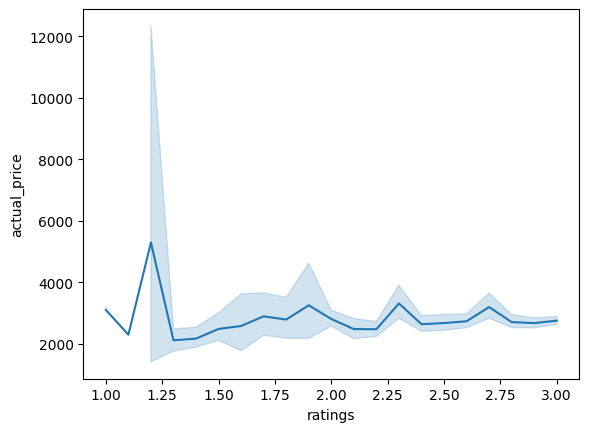

In [33]:
sns.lineplot(data=low_rated_products,x='ratings',y='actual_price')

Overall, the graph does not provide enough information to draw any strong conclusions about the actual price of the product over time.

for the low rated products

In [34]:
Ha='rating and actual price are not significance for low rated products'
H0='rating and actual price are significance for low rated products'

stat,p3=ttest_rel(low_rated_products['ratings'],low_rated_products['actual_price'])
p3
alpha=0.05  #95% significance
if p3<alpha:
  print('reject H0')
  print(Ha)
else:
  print('accept H0')
  print(H0)

reject H0
rating and actual price are not significance for low rated products


<Axes: xlabel='ratings', ylabel='discount_price'>

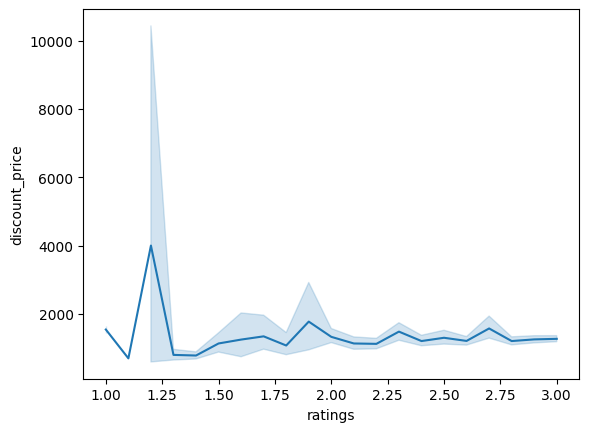

In [35]:
sns.lineplot(data=low_rated_products,x='ratings',y='discount_price')

Overall, the graph does not provide enough information to draw any strong conclusions about the discount price of the product over time.

for the low rated products

In [36]:
Ha='rating and discount price are not significance for low rated products'
H0='rating and discount price are significance for low rated products'

stat,p4=ttest_rel(low_rated_products['ratings'],low_rated_products['actual_price'])
p4
alpha=0.05  #95% significance
if p4<alpha:
  print('reject H0')
  print(Ha)
else:
  print('accept H0')
  print(H0)

reject H0
rating and discount price are not significance for low rated products


discount percentage


In [37]:
df[df['discount_percentage']==100]

,product_name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,company,discount_percentage,high_low
24400,LEGO Wildlife Rescue Hovercraft,toys & baby products,Toys & Games,4.6,98,324,324,LEGO,100.0,HIGH_RATED_PRODUCT
30893,SAMSONITE Evoa Polycarbonate 69 cms Brushed Si...,accessories,Bags & Luggage,3.7,13,22549,22550,SAMSONITE,100.0,HIGH_RATED_PRODUCT
90875,Relaxo Men's Flip Flops Thong Sandals,stores,Men's Fashion,4.3,25967,114,114,Relaxo,100.0,HIGH_RATED_PRODUCT
95419,Aristocrat Dual Edge 65cm Polycarbonate & Poly...,stores,Amazon Fashion,4.2,508,2823,2823,Aristocrat,100.0,HIGH_RATED_PRODUCT
115444,BAHAMAS Women's Whpk Flip-Flops - 8 UK/India (...,women's shoes,Shoes,4.1,423,164,164,BAHAMAS,100.0,HIGH_RATED_PRODUCT
120900,Aristocrat Polyester Hard 66 Cms Luggage- Suit...,accessories,Bags & Luggage,4.3,118,2823,2823,Aristocrat,100.0,HIGH_RATED_PRODUCT
121066,Aristocrat Polyester Hard 55 Cms Luggage- Suit...,accessories,Bags & Luggage,4.0,80,2173,2173,Aristocrat,100.0,HIGH_RATED_PRODUCT
140872,FLITE Men's Fl0292g Flip Flop,stores,Men's Fashion,3.9,4584,184,184,FLITE,100.0,HIGH_RATED_PRODUCT
208613,HP Laserjet Pro M126nw Multi-Function Monochro...,"tv, audio & cameras",All Electronics,4.2,5256,21328,21329,HP,100.0,HIGH_RATED_PRODUCT
232222,Rupa Thermocot Men's Cotton Thermal Top,men's clothing,Innerwear,4.1,161,337,337,Rupa,100.0,HIGH_RATED_PRODUCT


extra work


In [38]:
df.groupby(by='main_category')

In [39]:
# pd.pivot_table(df, index="main_category", columns="sub_category", values=["ratings"], aggfunc=np.max)